<a href="https://colab.research.google.com/github/kulendu/DeepLearning_practice/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#loading the fashion.mnist dataset
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #splitting into the training and testing datasets

4423680/4422102 [==============================] - 0s 0us/step


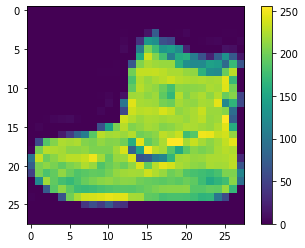

In [14]:
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [16]:
x_test.shape

(10000, 28, 28)

In [15]:
#normalie the data

x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
model = Sequential() #Declaring the model

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #final layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(
    x_train, 
    y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4846 - accuracy: 0.8260 - val_loss: 0.4462 - val_accuracy: 0.8284
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3639 - accuracy: 0.8657 - val_loss: 0.3803 - val_accuracy: 0.8602
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3294 - accuracy: 0.8779 - val_loss: 0.3560 - val_accuracy: 0.8695
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3057 - accuracy: 0.8855 - val_loss: 0.3594 - val_accuracy: 0.8678
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2874 - accuracy: 0.8922 - val_loss: 0.3911 - val_accuracy: 0.8571
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.8964 - val_loss: 0.3501 - val_accuracy: 0.8765
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - accuracy: 0.9020 - val_loss: 0.3376 - val_accuracy:

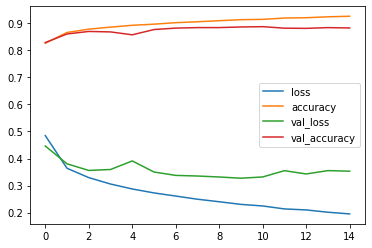

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [31]:
pred = model.predict_classes([x_test])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Consider rewriting this model with the Functional API.


In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.88      0.88      0.88      1000
           4       0.78      0.82      0.80      1000
           5       0.97      0.97      0.97      1000
           6       0.65      0.79      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [35]:
#more hypertuning to get the results more accurate
model = Sequential() #Declaring the model

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax')) #final layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
early_stop = EarlyStopping(monitor='val_loss',verbose=25,patience=1, mode='min')

In [40]:
model.fit(
    x_train, 
    y_train,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7476 - accuracy: 0.7284 - val_loss: 0.4802 - val_accuracy: 0.8303
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5418 - accuracy: 0.8055 - val_loss: 0.4497 - val_accuracy: 0.8343
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5033 - accuracy: 0.8199 - val_loss: 0.4253 - val_accuracy: 0.8454
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4815 - accuracy: 0.8287 - val_loss: 0.4165 - val_accuracy: 0.8458
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4701 - accuracy: 0.8314 - val_loss: 0.4076 - val_accuracy: 0.8557
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4596 - accuracy: 0.8357 - val_loss: 0.3958 - val_accuracy: 0.8517
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4455 - accuracy: 0.8393 - val_loss: 0.3913 - val_accuracy:

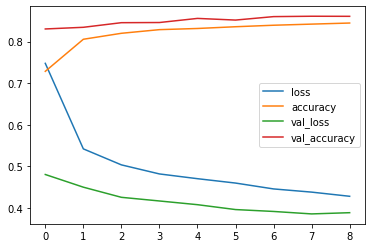

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [43]:
y_pred = model.predict_classes([x_test])

Consider rewriting this model with the Functional API.


In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.88      0.88      0.88      1000
           4       0.78      0.82      0.80      1000
           5       0.97      0.97      0.97      1000
           6       0.65      0.79      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [45]:
print(model.predict(x_test))

[[6.3397117e-08 1.1772997e-06 3.7601119e-08 ... 2.8507823e-01
  1.6402755e-05 6.3478655e-01]
 [2.5978357e-05 6.8345452e-10 9.9566805e-01 ... 6.8522562e-18
  2.7721623e-09 2.0411109e-13]
 [2.1737134e-13 1.0000000e+00 5.1290585e-15 ... 4.7767807e-22
  2.7818485e-18 3.5016096e-24]
 ...
 [3.4544704e-05 3.0428385e-10 9.5164830e-07 ... 7.4194283e-11
  9.9988842e-01 7.1791406e-10]
 [5.7448057e-11 9.9999917e-01 2.3150086e-12 ... 1.2119942e-16
  4.0564272e-14 3.1065717e-18]
 [1.6474515e-07 1.4525015e-09 1.5149014e-08 ... 2.5392693e-02
  2.5161935e-04 1.1690010e-04]]


In [57]:
predicted_value = pd.DataFrame(pred, columns=['predicted value'])
true_value = pd.DataFrame(y_test, columns=['true value'])


In [51]:
predicted_value = pd.concat([predicted_value, true_value], axis=1)

In [53]:
predicted_value.head(20)

,predicted value,true value
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


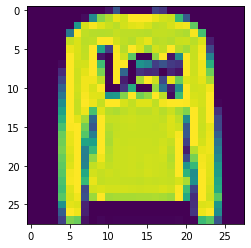

In [63]:
plt.imshow(x_test[1])
plt.show()